In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_folder = '/kaggle/input/indian-sign-language-dataset/data/'
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test
    
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res


In [4]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [5]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

In [6]:
print(x_train.shape,"train_image")
print(x_test.shape,"test_image")

(37800, 64, 64, 1) train_image
(4200, 64, 64, 1) test_image


In [7]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [8]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [9]:
classes = 35
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1182/1182 [==============================] - 12s 5ms/step - loss: 0.1298 - accuracy: 0.9672 - val_loss: 3.1290e-05 - val_accuracy: 1.0000
Epoch 2/10
1182/1182 [==============================] - 6s 5ms/step - loss: 1.5888e-05 - accuracy: 1.0000 - val_loss: 1.4849e-06 - val_accuracy: 1.0000
Epoch 3/10
1182/1182 [==============================] - 6s 5ms/step - loss: 5.4499e-07 - accuracy: 1.0000 - val_loss: 1.5985e-07 - val_accuracy: 1.0000
Epoch 4/10
1182/1182 [==============================] - 5s 5ms/step - loss: 1.0898e-07 - accuracy: 1.0000 - val_loss: 6.7041e-08 - val_accuracy: 1.0000
Epoch 5/10
1182/1182 [==============================] - 6s 5ms/step - loss: 4.4744e-08 - accuracy: 1.0000 - val_loss: 3.0143e-08 - val_accuracy: 1.0000
Epoch 6/10
1182/1182 [==============================] - 6s 5ms/step - loss: 2.3142e-08 - accuracy: 1.0000 - val_loss: 1.8761e-08 - val_accuracy: 1.0000
Epoch 7/10
1182/1182 [==============================] - 6s 5ms/step - loss: 1.4378e-08 - ac

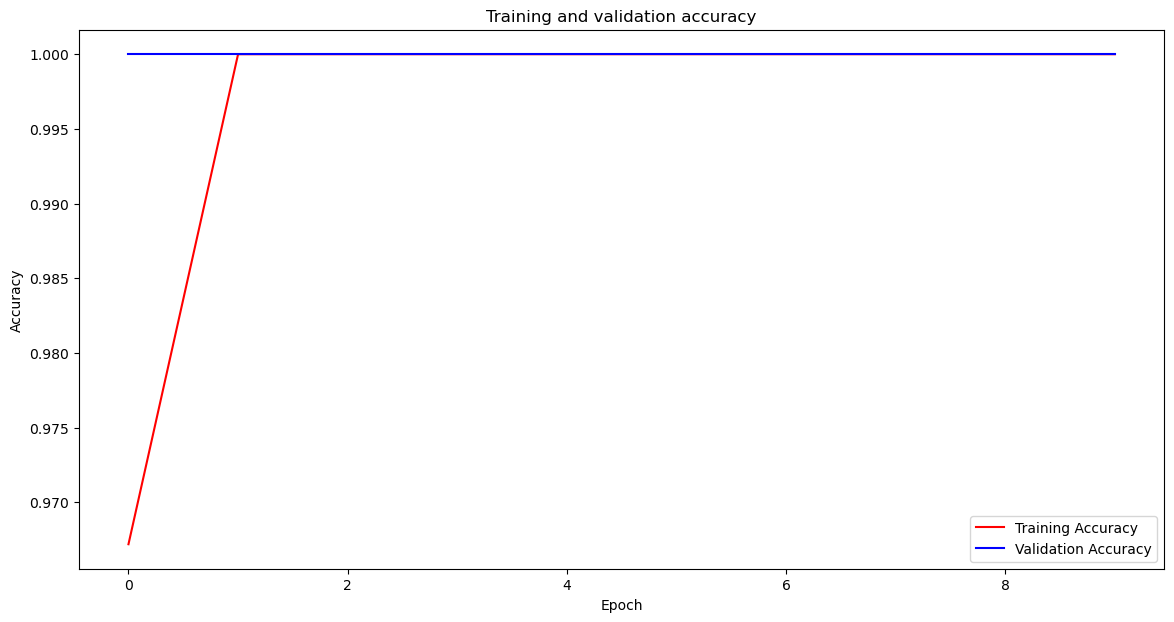

In [10]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
class_labels = list(map_characters.values())

(128, 128)
(64, 64)
1/1 [==============================] - 0s 147ms/step
4


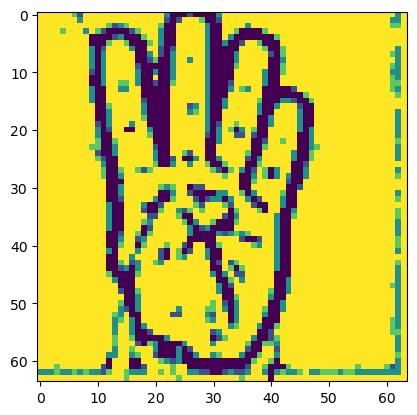

In [12]:
filename='/kaggle/input/indian-sign-language-dataset/data/4/1.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)


(128, 128)
(64, 64)
1/1 [==============================] - 0s 19ms/step
U


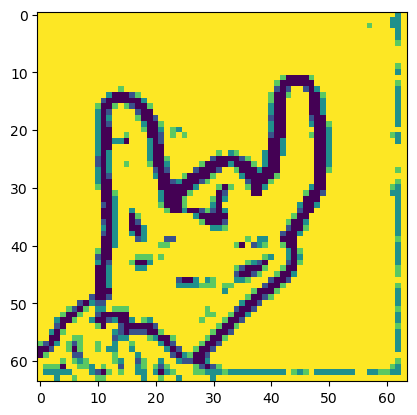

In [13]:
filename='/kaggle/input/indian-sign-language-dataset/data/U/1.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)


(128, 128)
(64, 64)
1/1 [==============================] - 0s 18ms/step
B


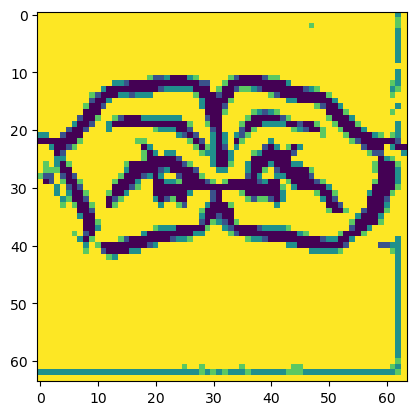

In [14]:
filename='/kaggle/input/indian-sign-language-dataset/data/B/1.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)


(128, 128)
(64, 64)
1/1 [==============================] - 0s 19ms/step
D


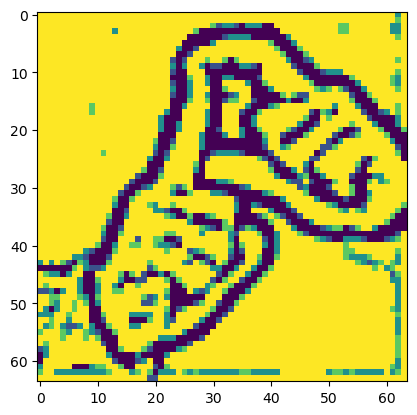

In [15]:
filename='/kaggle/input/indian-sign-language-dataset/data/D/1.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)


(128, 128)
(64, 64)
1/1 [==============================] - 0s 18ms/step
C


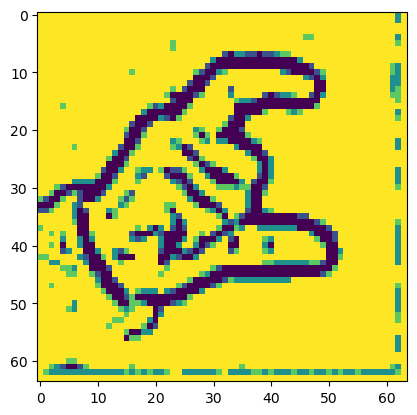

In [31]:


def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

filename='/kaggle/input/indian-sign-language-dataset/data/C/1000.jpg'
img = cv2.imread(filename,0)
print(img.shape)
img = edge_detection(img)
img = cv2.resize(img, (64, 64))
print(img.shape)
img = img_to_array(img)
plt.imshow(img)

#width, height = img.size
# reshape it
p = img.reshape(1, 64, 64, 1)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_labels[model.predict(p).argmax()]
print(predicted_label)


In [17]:
model.save("sign_model.h5")

Original image shape: (128, 128)
Resized image shape: (64, 64)
1/1 [==============================] - 0s 83ms/step


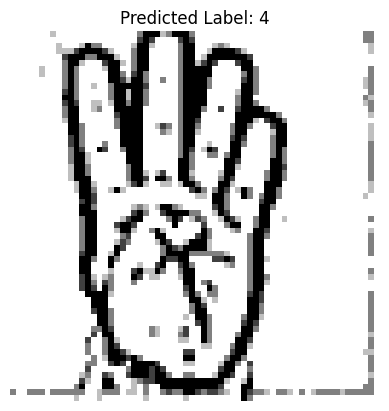

Predicted Sign: 4


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load the model
model1 = load_model("sign_model.h5")

# Class labels as a dictionary
class_label = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
               13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
               25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image, (5, 5), 2)
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return res

def predict_sign(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    print(f"Original image shape: {img.shape}")
    
    # Apply edge detection
    img = edge_detection(img)
    
    # Resize image to match model input
    img = cv2.resize(img, (64, 64))
    print(f"Resized image shape: {img.shape}")
    
    # Convert image to array and normalize
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    
    # Predict the class
    predictions = model1.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_label[predicted_class]
    
    # Display the image
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return predicted_label

# Example usage:
filename = 'sign/4/4.jpg'
result = predict_sign(filename)
print(f'Predicted Sign: {result}')


Original image shape: (128, 128)
Resized image shape: (64, 64)
1/1 [==============================] - 0s 77ms/step


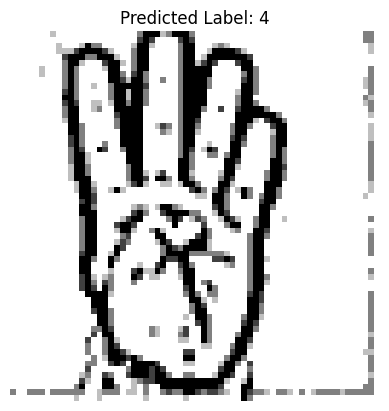

Predicted Sign: 4


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import pyttsx3

# Load the model
model1 = load_model("sign_model.h5")

# Class labels as a dictionary
class_label = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
               13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
               25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image, (5, 5), 2)
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return res

def predict_sign(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, 0)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    print(f"Original image shape: {img.shape}")
    
    # Apply edge detection
    img = edge_detection(img)
    
    # Resize image to match model input
    img = cv2.resize(img, (64, 64))
    print(f"Resized image shape: {img.shape}")
    
    # Convert image to array and normalize
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    
    # Predict the class
    predictions = model1.predict(img)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_label[predicted_class]
    
    # Display the image
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return predicted_label

def speak_text(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

# Example usage:
filename = 'sign/4/4.jpg'
result = predict_sign(filename)
print(f'Predicted Sign: {result}')
speak_text(f'The predicted sign is {result}')
